---

title: "Sun Country customer analysis"
author: "Anthony Meyers, Danny Moncada, Jonathan Watkins,Michael DeGuire,Sarah Black"
date: "October 22nd, 2019"
output: pdf_document

---

# (I think the knit process creates the contents - probably delete this block)

### Contents
**Problem Statement and Approach**
What are Sun Countries Objectives?
UFly Rewards
SCA Booking

**Data Preparation**
_insert steps we did to clean and process the data_

**Exploratory Analysis of the Sun Country Flight Data**
_Simple exploratory analysis of the FULL data set_

**Clustering Strategies Towards Customer Segmentation**
1. Characteristics of UFly Reward members
2. Characteristics of Fliers

**Conclusions**
_This is where we put conclusions from the above_

**Recommendations**

## Problem Statement and our Approach

**Sun Countries Objectives**

In order to compete with major airline firms, Sun Country Airlines needs to be savvy and sophisticated in their marketing and customer interaction strategy. Sun Countries Ufly reward program and digital experience provide Sun Country a platform in which to enable modern marketing and analytics techniques to create value to enable Sun Country to compete with other, more resource enabled, airline firms.
Leveraging exploratory analytics techniques, such as clustering analysis, will enable Sun Country to generate insights and actionable hypotheses from the data. Examining the characteristics of customer cohorts and their flying habits will help Sun Counry focus their strategic initiatives to delivering best in class service and options to the Sun Country customer base.

**Our Approach**

We propose a customer segmentation analytics approach to guide the exploration of customer characteristics and how they travel. Specifically, we choose to explore the portion of customer who use the Minneapolis - St.Paul Sun Country hub as their start point for their journeys, as coded in the data.
We then leverage a k-medioids approach to cluster mixed data-types. This partioning around mediods algorithm leverages Gower distance to appropriately compute partial dissimilarities and is very intuitive. It also has an extremely useful feature in that it can produce statistics around what a typical customer might look like for each cluster, allowing us to see who is, or isn't, traveling with a UFly membership or booking through the SCA site.



## Data Preparation

missing values
segments to trips
working with samples




## Exploratory Analysis of the Sun Country Flight Data




In [4]:
## JONATHAN INSERT ANY CODE YOU HAVE HERE

We found # Clusters - brief description

One particular cluster of interest was Men in their 50's who fly from Minneapolis to Las Vegas in coach, booking via the Sun Country Website, that are not Ufly Rewards members or credit card holders. Minneapolis to Las Vegas is a very popular flight for Sun Country and is offered frequently and this group of flyers in particular stands out. This customer segment is already booking through the website so an extra push to get them to be Ufly Rewards members may help to get them to make more trips on Sun Country. 


## Clustering Strategies Towards Customer Segmentation
_some text here explaining the clustering techniques again_

1.) Defining the characteristics of UFly reward fliers

2.) Defining the characteristics of flights booked through the SCA site




In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(cluster))
suppressPackageStartupMessages(library(factoextra))
suppressPackageStartupMessages(library(corrplot))
suppressPackageStartupMessages(library(PerformanceAnalytics))

In [3]:
## Set the working directory
## This can be changed based on where you have your data

data.dir = "C:/Users/monca016/Documents/Fall 2019/MSBA 6410 - Exploratory Analytics/HW2/"


## Set the file name
data.file = "SunCountry_MSPDepartures_20kSample_wCluster.csv"


cluster_data = read.csv(paste(data.dir, data.file, sep = ""))

In [ ]:
gower = daisy(cluster_data, metric = "gower")

gower_mat = as.matrix(gower)

#find similar characteristics
#data_feats_sample[which(gower_mat == min(gower_mat[gower_mat != min(gower_mat)]), arr.ind = TRUE)[1, ], ]

#find not similar characteristics
#data_feats_sample[which(gower_mat == min(gower_mat[gower_mat != max(gower_mat)]), arr.ind = TRUE)[1, ], ]

#determine a number of clusters ----------------
sil_width = c(NA)

for(i in 2:8){
  pam_fit = pam(gower, diss = TRUE, k = i)
  sil_width[i] = pam_fit$silinfo$avg.width
}

plot(1:8, sil_width,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:8, sil_width)

#get a summary of the clusters ----------------
k = 6
pam_fit = pam(gower, diss = TRUE, k)
pam_results = data_feats_sample %>%
  mutate(cluster = pam_fit$clustering) %>%
  group_by(cluster) %>%
  do(the_summary = summary(.))
pam_results$the_summary

Warning message in daisy(cluster_data, metric = "gower"):
"binary variable(s) 9, 10 treated as interval scaled"

In [4]:
## Make a copy of the data - now that we have it loaded
## We don't want to screw up any transformations
suncountry = cluster_data

## View the first few rows to see the structure of the data

head(suncountry)

id,ServiceStartCity,ServiceEndCity,GenderCode,BookingChannel,TimeGap,TripMonth,Age,UflyMember,CardHolderFlag,cluster
1,MSP,SAN,F,Outside Booking,27,December,21,0,0,1
2,MSP,DFW,M,SCA Website Booking,20,October,45,1,0,2
3,MSP,SEA,F,Outside Booking,63,December,63,0,0,3
4,MSP,SEA,F,SCA Website Booking,63,August,39,0,0,4
5,MSP,ANC,F,Outside Booking,137,July,25,0,0,3
6,MSP,CUN,M,Outside Booking,24,December,21,0,0,1


In [5]:
## View some summary statistics of the clustered dataset

summary(suncountry)

       id        ServiceStartCity ServiceEndCity  GenderCode
 Min.   :    1   MSP:20000        LAS    : 2550   F:10479   
 1st Qu.: 5001                    MCO    : 1939   M: 9520   
 Median :10000                    JFK    : 1414   U:    1   
 Mean   :10000                    LAX    : 1347             
 3rd Qu.:15000                    SFO    : 1308             
 Max.   :20000                    RSW    : 1293             
                                  (Other):10149             
              BookingChannel    TimeGap          TripMonth         Age        
 SCA Website Booking :9025   Min.   :  0.00   March   :2726   Min.   :  0.00  
 Outside Booking     :7728   1st Qu.: 20.00   February:2074   1st Qu.: 26.00  
 Reservations Booking:1646   Median : 46.00   December:2039   Median : 42.00  
 SY Vacation         : 749   Mean   : 63.35   January :1632   Mean   : 40.71  
 Tour Operator Portal: 748   3rd Qu.: 89.00   October :1631   3rd Qu.: 55.00  
 MSP                 :  66   Max.   :6

In [6]:
## Generate some quick tables to view categorical variables and their distributions

table(suncountry$ServiceStartCity)
table(suncountry$ServiceEndCity)

table(suncountry$TripMonth)

table(suncountry$GenderCode)

table(suncountry$UflyMember)

table(suncountry$CardHolderFlag)

table(suncountry$cluster)


  MSP 
20000 


 ANC  BOS  CUN  CZM  DCA  DFW  GRB  HRL  HUX  IFP  JFK  LAN  LAS  LAX  LIR  MBJ 
 249 1121 1048  112  614  706    3  386   35   10 1414  303 2550 1347   68  132 
 MCO  MDW  MIA  MZT  PHX  PNS  PSP  PUJ  PVR  RSW  SAN  SEA  SFO  SJD  SJU  STT 
1939  556  217   81  871    3  526  209  368 1293  642 1164 1308  138   58   78 
 SXM  TPA  ZIH 
  72  283   96 


    April    August  December  February   January      July      June     March 
     1466      1468      2039      2074      1632      1596      1493      2726 
      May  November   October September 
     1416      1398      1631      1061 


    F     M     U 
10479  9520     1 


    0     1 
15406  4594 


    0     1 
19770   230 


   1    2    3    4    5    6 
4001 1905 4212 3800 3720 2362 

In [7]:
## Taking one extra step here to filter out the one row with U for the Gender Analysis
suncountry <- suncountry %>% filter(GenderCode != 'U')

## Set cluster as the customer segment and also make it at factor

suncountry$cluster <- as.factor(suncountry$cluster)

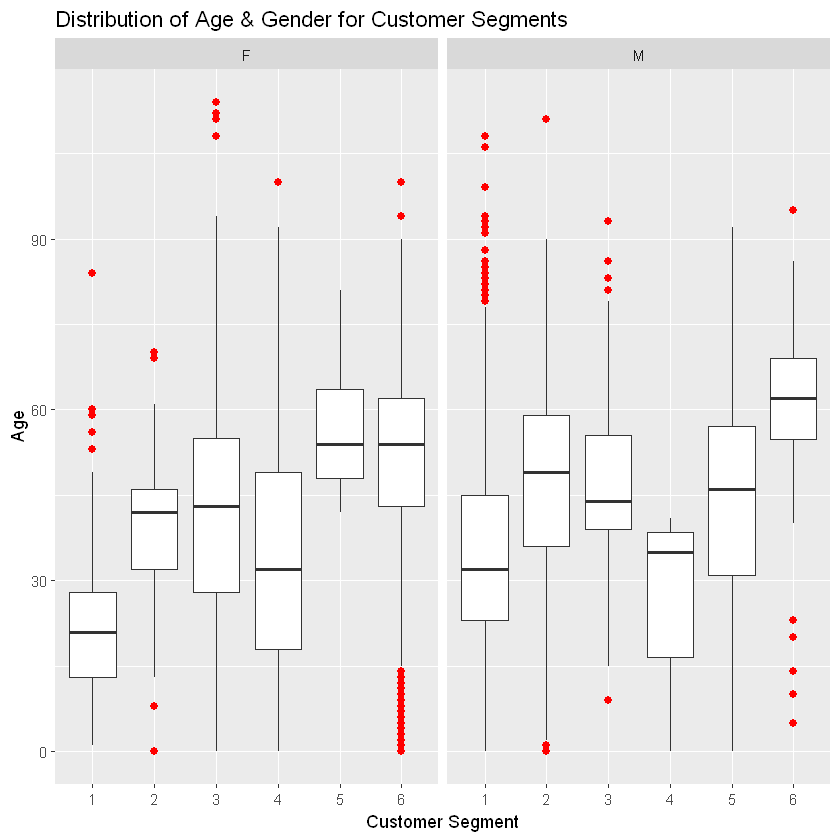

In [8]:
## Distributions for Age based on the customer segment - we see a lot of outliers

ggplot(suncountry, aes(x = cluster, y = Age)) +
        geom_boxplot(outlier.colour="red", outlier.size=2) + facet_grid(. ~ GenderCode) +
        labs(x="Customer Segment", title = "Distribution of Age & Gender for Customer Segments")

In [9]:
## Distributions of Final Destinations for Each Customer Segment

customer_segment_final_destination <- suncountry %>% 
        
        ## Group by the cluster and end city
        group_by(cluster, ServiceEndCity) %>%
        ## Count the number of times each end city appears
        summarise(id = n()) %>%
        ## Grab the top 10 final destinations for each to make for easier plotting
        top_n(10)

## Now we pivot the table a bit so that we organize by the final destinations for each segment - we'll use this in the next plot
final_dest_total_trips <- customer_segment_final_destination %>% 
        group_by(ServiceEndCity, cluster) %>%
        summarise(total_trips = sum(id))

Selecting by id


In [10]:
## Generate a table showing the grand total for each final desination

sorted_table <- final_dest_total_trips %>%
        group_by(ServiceEndCity) %>%
        summarise(grand_total = sum(total_trips)) %>%
        arrange(desc(grand_total))


levels = sorted_table$ServiceEndCity

## Re-arranging the sort order for our final destionation to help generate a more understandable graphic
final_dest_total_trips$ServiceEndCity <- factor(final_dest_total_trips$ServiceEndCity, levels = levels)

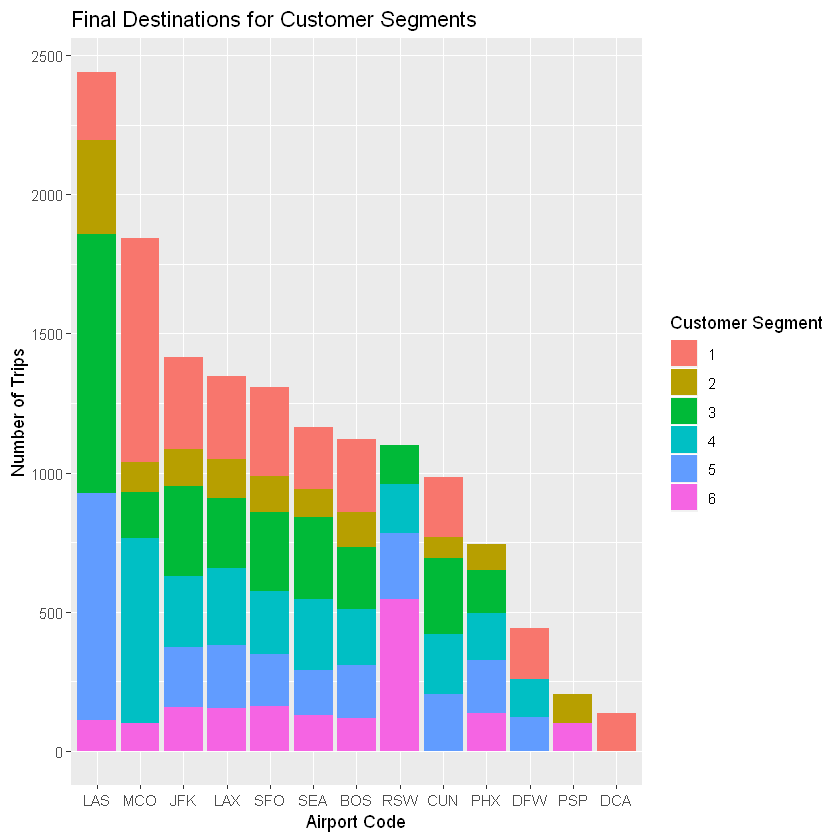

In [11]:
ggplot(final_dest_total_trips) +
        aes(x = ServiceEndCity, fill = cluster, weight = total_trips) +
        geom_bar() +
        scale_fill_hue() +
        labs(x = "Airport Code", y = "Number of Trips", title = "Final Destinations for Customer Segments", fill = "Customer Segment")

In [12]:
## Visualize how these flights were booked

## Group by booking channel and cluster

customer_segments_booking_channel <-
        suncountry %>%
                group_by(BookingChannel, cluster) %>%
                summarise(booking_count = n()) %>%
                arrange(desc(booking_count))

## Observe the first few rows
head(customer_segments_booking_channel)

BookingChannel,cluster,booking_count
Outside Booking,3,3356
Outside Booking,1,3239
SCA Website Booking,4,2841
SCA Website Booking,5,2587
SCA Website Booking,6,1836
SCA Website Booking,2,1337


In [13]:
sorted_booking_channel <- customer_segments_booking_channel %>%
        group_by(BookingChannel) %>%
        summarise(grand_total = sum(booking_count)) %>%
        arrange((grand_total))

levels = sorted_booking_channel$BookingChannel

## Re-arranging the sort order for our final destionation to help generate a more understandable graphic
customer_segments_booking_channel$BookingChannel <- factor(customer_segments_booking_channel$BookingChannel, levels = levels)

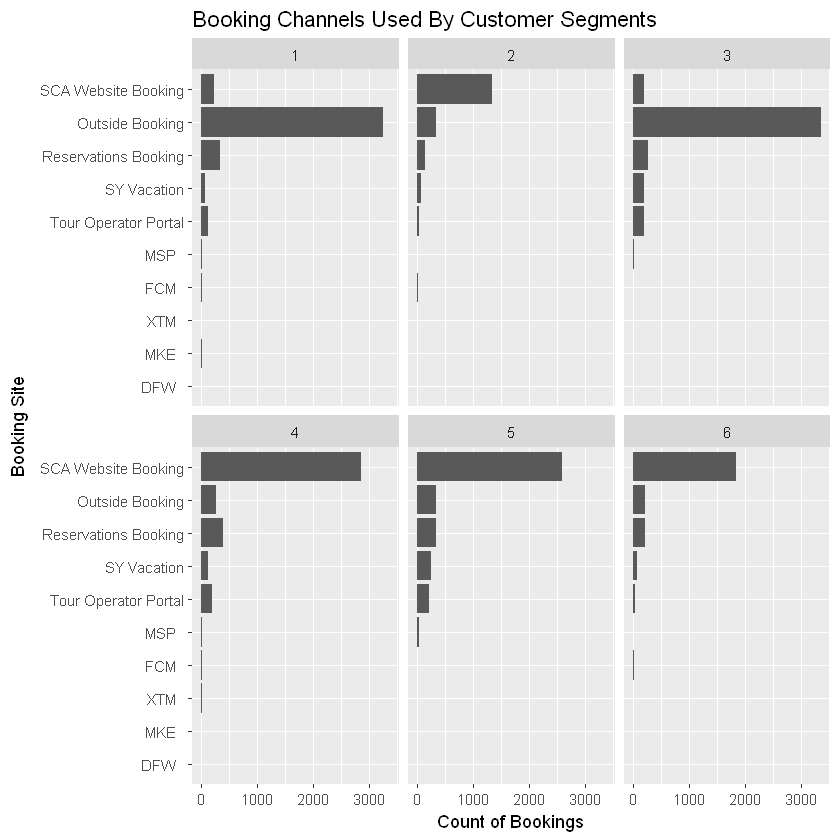

In [14]:
## Interesting observation - we see that customer segments 1 and 3 predominately used outside booking channels
## Customer Segments 4 & 5 used the Sun Country website

ggplot(customer_segments_booking_channel) +
        aes(x = BookingChannel, weight = booking_count) +
        geom_bar() +
        scale_fill_hue() +
        coord_flip() +
        labs(x = "Booking Site", y = "Count of Bookings", title = "Booking Channels Used By Customer Segments", fill = "Customer Segment") +
        facet_wrap(cluster ~ .)

In [15]:
customer_segment_ufly <-

suncountry %>%
        group_by(UflyMember, cluster) %>%
        summarise(grp_count = n()) %>%
        arrange(desc(grp_count))

In [16]:
## Convert UFlyMember column to factor variable
customer_segment_ufly$UflyMember <- as.factor(customer_segment_ufly$UflyMember)

customer_segment_ufly <-
        customer_segment_ufly %>%
                mutate(UflyMember_Factor = fct_recode(UflyMember,
                        "UFly Members" = "1",
                        "Potential UFly Members" = "0"))

In [ ]:
ggplot(customer_segment_ufly) +
 aes(x = UflyMember_Factor, weight = grp_count) +
 geom_bar() +
 labs(x = "", title = "UFly Members by Customer Segment", y = "Number of Bookings", caption = "Demonstrating the potential membership conversion") +
 theme_gray() +
 facet_wrap(vars(cluster))

Now we go back to the original data set, and pull in all the Sun Country data available to us.  This is a three million+ row data set, so we won't run through the code blocks.  But we do some processing work here.

In [ ]:
## Takes about 5 minutes to load the whole dataframe - we won't be running that again

## data.dir = "C:/Users/monca016/Documents/Fall 2019/MSBA 6410 - Exploratory Analytics/HW2/"


## Set the file name
data.file = "SunCountry.csv"


cluster_data = read.csv(paste(data.dir, data.file, sep = ""))




data.dir = "C:/Users/monca016/Documents/Fall 2019/MSBA 6410 - Exploratory Analytics/HW2/SunCountry.csv"

data = read.csv(data.dir)

#parse data------------------------------------------------------------------
data = data %>% filter(MarketingAirlineCode == "SY") %>% select(TicketNum, PNRLocatorID, CouponSeqNbr, ServiceStartCity,ServiceEndCity, PNRCreateDate, ServiceStartDate, GenderCode,
                Age, PostalCode, BkdClassOfService, TrvldClassOfService, BookingChannel, BaseFareAmt, TotalDocAmt, UflyMemberStatus,
                CardHolder, BookedProduct, EnrollDate, StopoverCode)

## Conclusions

## Recommendations

Methods to encourage people to sign up for Ufly Rewards

Methods to encourage booking on the Sun Country Website

Specifically address the MSP -> Vegas older men